# House Prices - Regression Predictions YData 2024    

**Team: Random Forest Rangers** ([Dmitry Gufranov](https://www.linkedin.com/in/gufranov/), [Evgenia Amineva](https://www.linkedin.com/in/janeami/), [Valeriya Vazhnova](https://www.linkedin.com/in/gufranov/))

## Part 1. EDA

The EDA below answers the following questions:

* [Which 3 features have the highest number of missing values](#first_q)
* [How the price behave over the years?](#second_q)
* [Plot the the feature distribution using histograms](#third_q)
* [Compute and order the features by their correlation with label](#fourth_q)
* [Add more EDA that will help you understand the data and support your modeling decisions](#fifth_q)

### Import libraries

In [1]:
import pandas as pd 
import numpy as np 
import datetime

# vizualisation
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# ml
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

### Loading the data

In [3]:
# load the train data
df = pd.read_csv('train.csv')
display(df.head())
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
# get info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# check empty columns
print("Number of empty columns:", df.isnull().all().sum(), "\n")

# check duplicates
print("Number of duplicates (Id column is disregarded):", df.drop(columns=['Id']).duplicated().sum(), "\n")

# check uniqueness of Id
print("All Ids are unique:", df['Id'].is_unique)

Number of empty columns: 0 

Number of duplicates (Id column is disregarded): 0 

All Ids are unique: True


### 1.1 3 features with the highest number of missing values <a class="anchor" id="first_q"></a>

In [7]:
# Percentage of missing values
missing_val = df.isnull().sum()
missing_val = missing_val[missing_val > 0] / df.shape[0] *100
missing_val.sort_values(ascending=False, inplace=True)

print("Percantage of missing values by columns: \n\n",missing_val)

Percantage of missing values by columns: 

 PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


In [8]:
# number of missing values among the 3 features with the most missing values
df.isnull().sum().sort_values(ascending=False)[:3]

PoolQC         1453
MiscFeature    1406
Alley          1369
dtype: int64

Let's look at the information about the features with the highest number of missing values in the data description file

<b>PoolQC</b>: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

<b>MiscFeature</b>: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

<b>Alley</b>: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

It appears that NA value has a meaning according to the data description file. Let's take a closer look at the values in these columns:

In [9]:
for c in ['PoolQC', 'MiscFeature', 'Alley']:
    print(df[c].value_counts(), '\n')

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64 

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64 

Alley
Grvl    50
Pave    41
Name: count, dtype: int64 



Since 'NA' doesn't appear as a separate value in the columns above, for the columns 'PoolQC' and 'Alley' we can consider it as significant information meaning 'No Pool' and 'No alley access' respectfully. It may be useful for our main goal and later we will need to fill them with 'NA' label.

Also, information about the Pool should match between the columns 'PoolQC' and 'PoolArea', let's check it:

In [10]:
df[df['PoolArea']!=0]['PoolArea'].count() == df[~df['PoolQC'].isna()]['PoolQC'].count()

True

### 1.2 Price behavior over the years <a class="anchor" id="second_q"></a>

To evaluate the price behavior over the years we will create four plots:

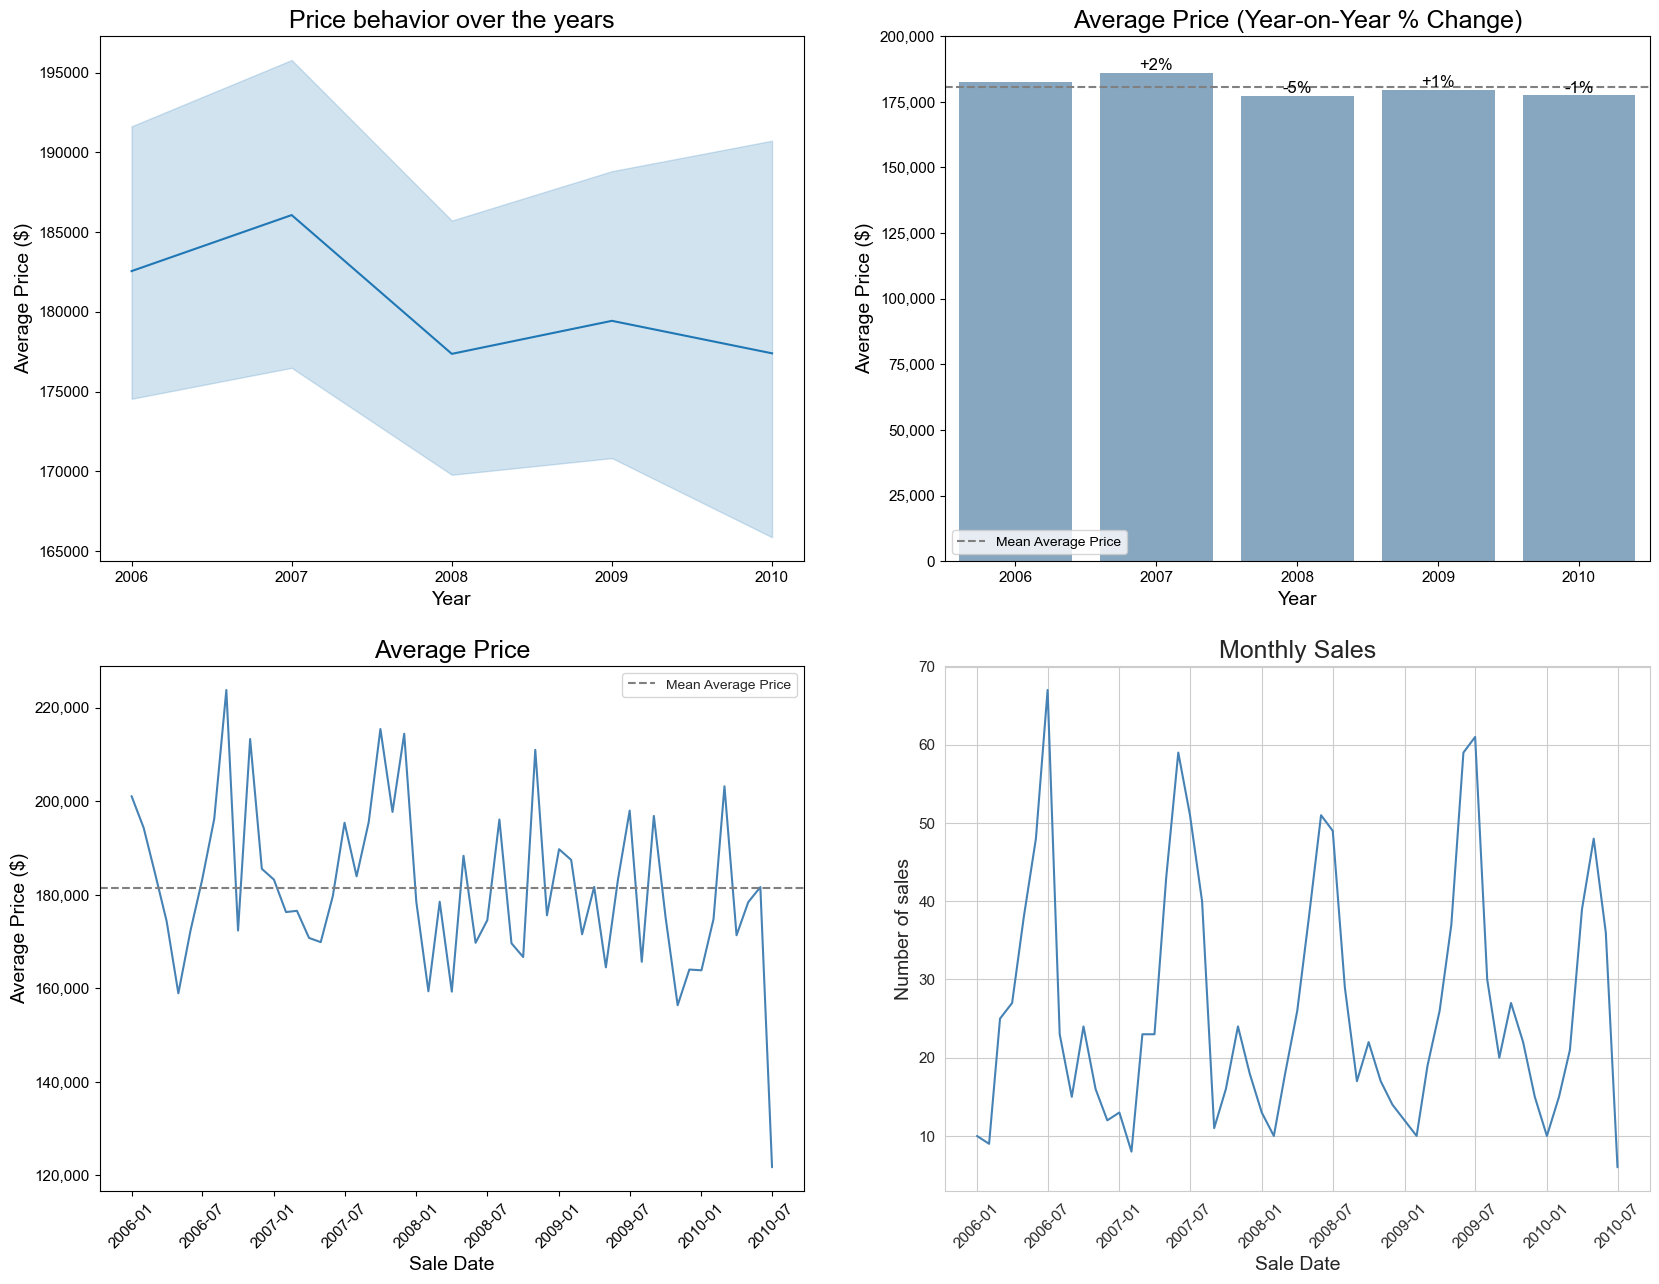

In [11]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)

sns.lineplot(df, x = 'YrSold', y='SalePrice')

plt.xticks(df['YrSold'].unique(), fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Average Price ($)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Price behavior over the years', fontsize=18)


plt.subplot(2, 2, 2)

# how did price behave over the years

df_dt = df.copy()

year_price = df_dt.groupby('YrSold')['SalePrice'].mean().to_frame('AvgPrice')
year_price['YearOnYearChange'] = year_price['AvgPrice'].pct_change()
year_price['ChangeLabel'] = year_price['YearOnYearChange'].map(lambda x: 
                                                               f'+{x :.0%}' if x > 0 else f'{x :.0%}')

# Create the plot
sns.barplot(data=year_price, x=year_price.index, y='AvgPrice', color='steelblue', alpha=0.7)
plt.axhline(y=year_price['AvgPrice'].mean(), linestyle='--', color='grey', label='Mean Average Price')

for i, label in enumerate(year_price['ChangeLabel'][1:], start=1):
    plt.text(i, year_price['AvgPrice'].iloc[i], label, ha='center', va='bottom', fontsize=12)

plt.title('Average Price (Year-on-Year % Change)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.ylim(0, 200000)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend(loc='lower left')
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)

plt.subplot(2, 2, 3)

# combining month and year
df_dt['SaleDate'] = df_dt.apply(lambda x: datetime.date(x['YrSold'], x['MoSold'], 1), axis=1)

# how did the price behave over the months
month_price = df_dt.groupby('SaleDate')['SalePrice'].mean().to_frame('AvgPrice')

sns.set_style("whitegrid")

sns.lineplot(data=month_price, x=month_price.index, y='AvgPrice', color='steelblue')
plt.axhline(y=month_price['AvgPrice'].mean(), linestyle='--', color='grey', label='Mean Average Price')

plt.title('Average Price', fontsize=18)
plt.xlabel('Sale Date', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(fontsize=11, rotation=45)
plt.yticks(fontsize=11)
plt.legend()

plt.subplot(2, 2, 4)

month_sale = df_dt.groupby('SaleDate').size().to_frame('Sales')

sns.lineplot(data=month_sale, x=month_sale.index, y='Sales', color='steelblue')
plt.title('Monthly Sales', fontsize=18)
plt.xlabel('Sale Date', fontsize=14)
plt.ylabel('Number of sales', fontsize=14)
plt.xticks(fontsize=11, rotation=45)
plt.yticks(fontsize=11)
plt.show();


Our data covers the span of 5 years (2006-2010). Over that time average prices were pretty stable, centered around $180K, with with year-on-year variations under 5%.

Sale Price fluctuates heavily from month to month. We can also notice some seasonality: at the beginning of each year (approx. until May) average prices decline, they reach their peak height in September–November, but usually drop again by December. 

But it's more interesting to check the seasonality by the number of sales, where the trend is the opposite: autumn has a significant drop in housing sales, so each observation gains more weight (and thus raises the average price). Peak sales are always in June-July (possibly before the beginning of the school year).

### 1.3 Features distribution <a class="anchor" id="third_q"></a>

In [12]:
# convert categorical features to numerical

df_cat = df.copy()
# get dtypes in columns
c_dtype = df.dtypes
# we need to convert our categorical feature to numerical
for c in c_dtype[c_dtype=='object'].index:
    df_cat[c] = df_cat[c].astype('category').cat.codes

<Figure size 640x480 with 0 Axes>

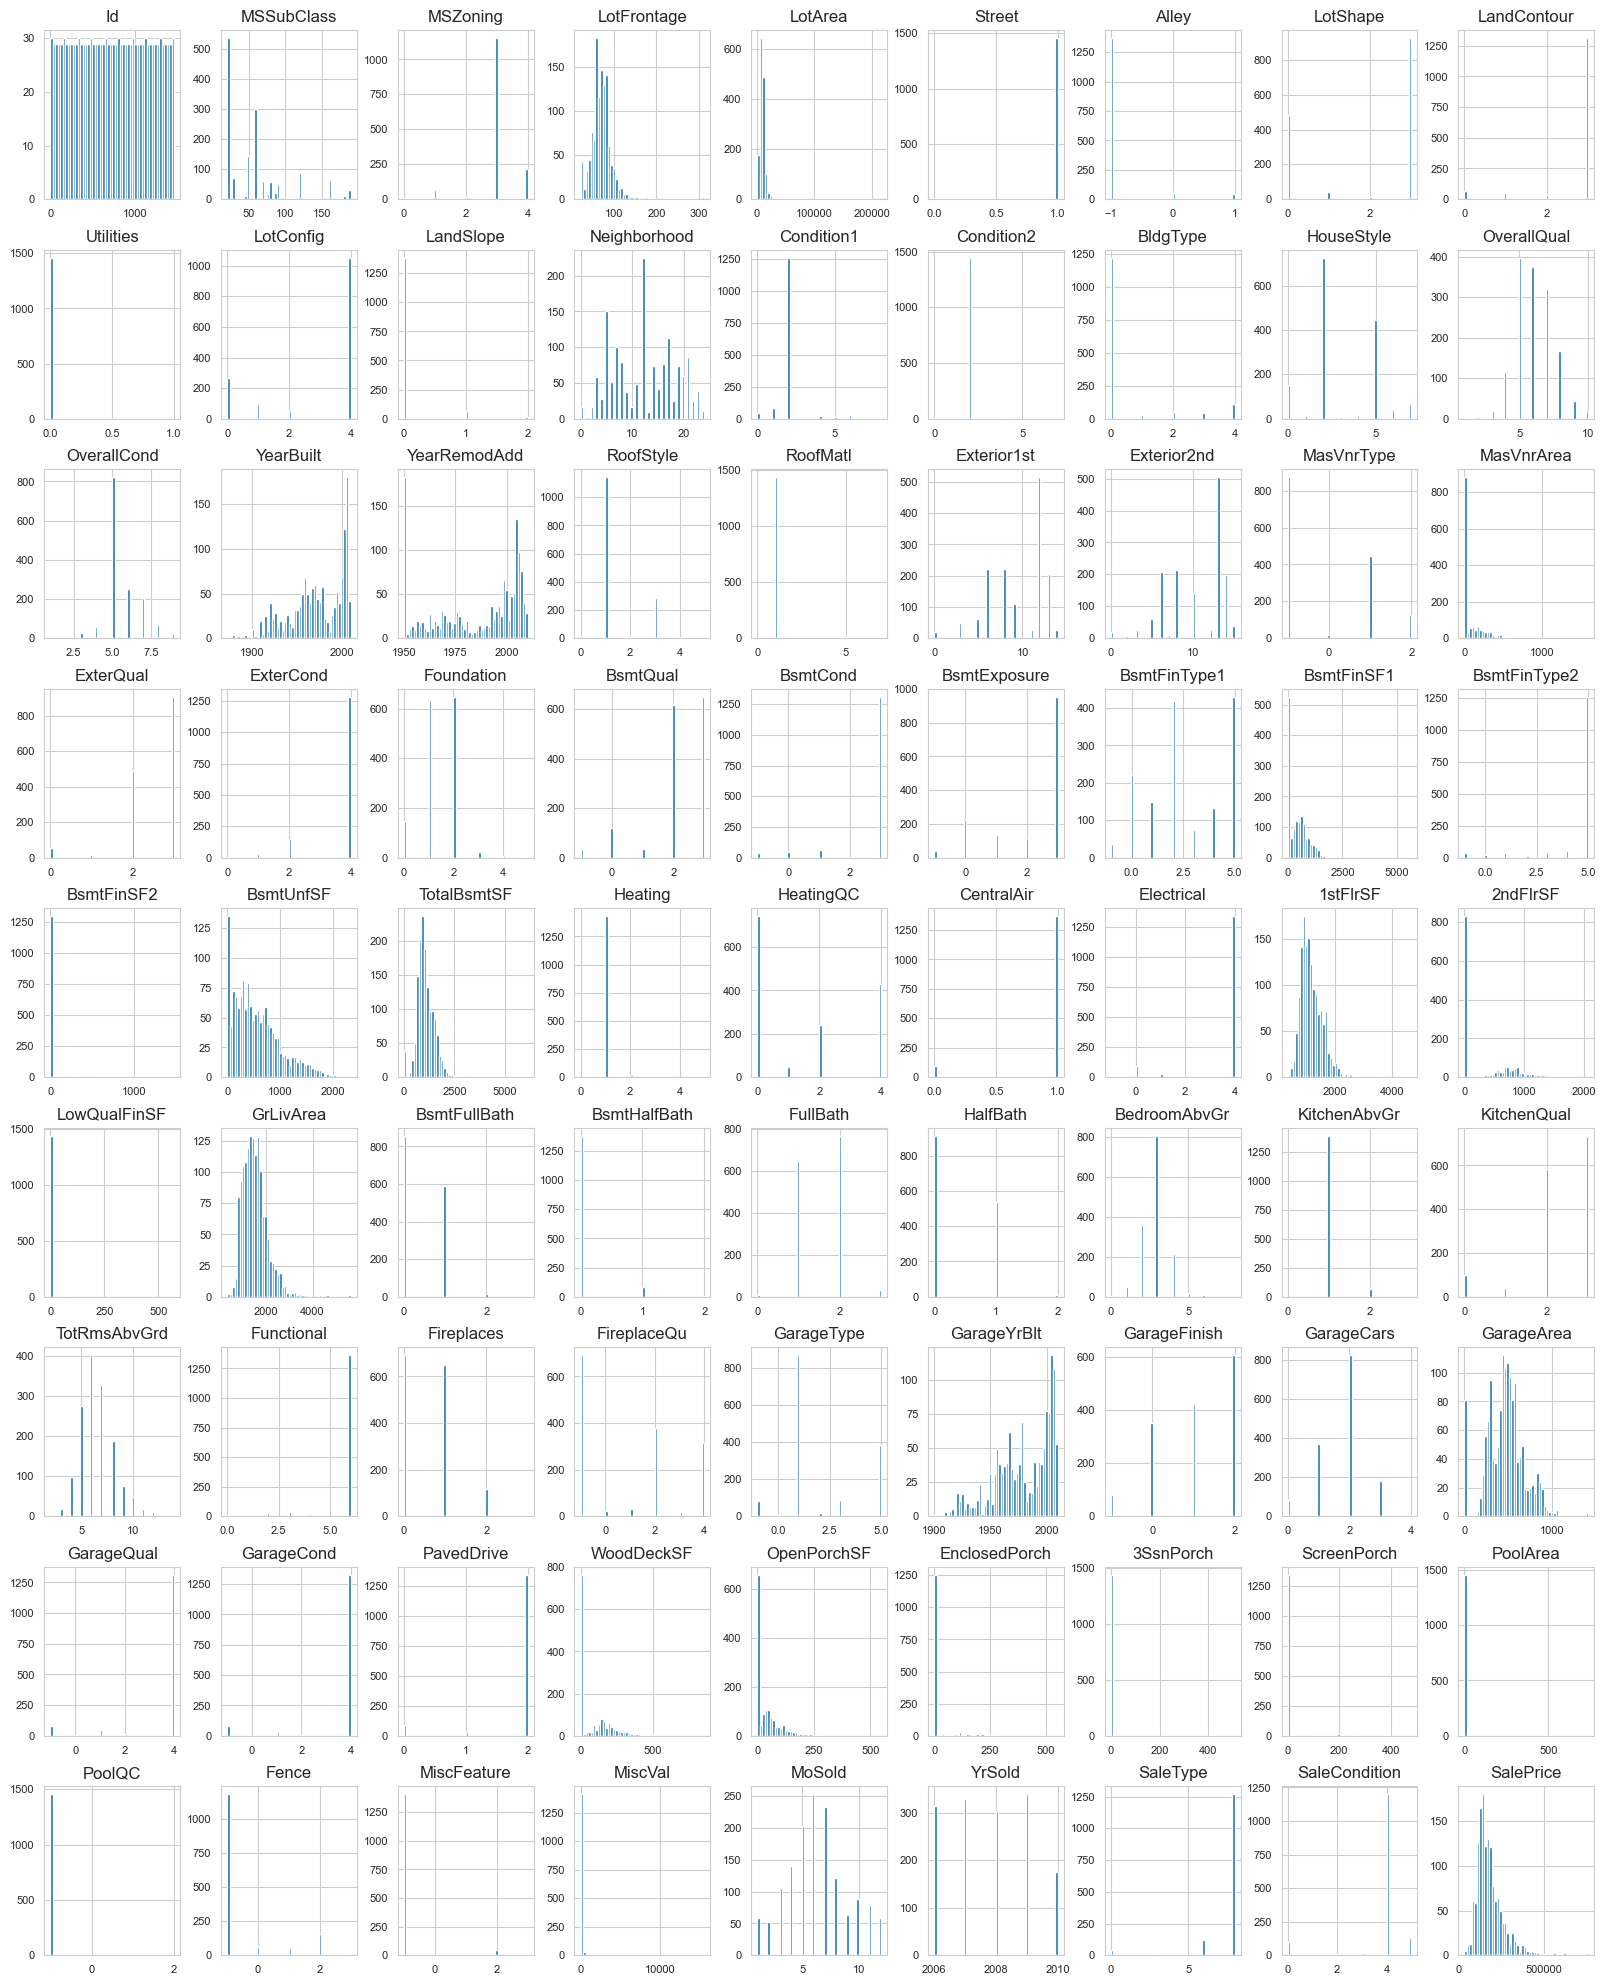

In [13]:
# features distribution
plt.figure()

df_cat.hist(figsize=(20, 25), bins=50, xlabelsize=8, ylabelsize=8)

plt.show()

We can observe that many numerical data are skewed, hence they will require normalization if we apply ML algorithms that assume normality.

Let's look more closely at the label distribution:

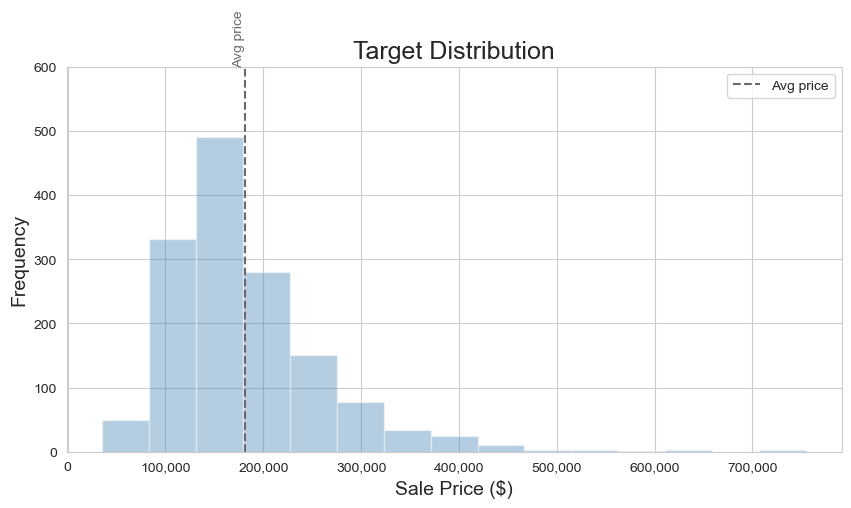

In [14]:
# overall distribution

plt.figure(figsize=(10, 5))
sns.distplot(df['SalePrice'], bins=15, color='steelblue', kde=False)
plt.axvline(x=df['SalePrice'].mean(), linestyle='--', color='dimgrey', label='Avg price')
plt.text(df['SalePrice'].mean(), 600, 'Avg price', rotation=90, va='bottom', ha='right', color='dimgrey')
plt.title('Target Distribution', fontsize=18)
plt.xlabel('Sale Price ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.ylim(0, 600)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend()
plt.show();

In [15]:
display(df['SalePrice'].describe())
print(f'95th percentile: {np.percentile(df["SalePrice"], 95) :,.0f}')
print(f'Skewness: {df["SalePrice"].skew() :,.2f}')
print(f'Kurtosis: {df["SalePrice"].kurtosis() :,.2f}')

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

95th percentile: 326,100
Skewness: 1.88
Kurtosis: 6.54


While overall our target (Sale Price) is distributed normally, its distribution is heavily skewed to the right with very high prices as outliers. We can see it from the high skewness coefficient (>1), high positive kurtosis indicating heavy tails, as well as the histogram itself.

### 1.4 Features correlation with the label <a class="anchor" id="fourth_q"></a>

In [16]:
# calculate correlation index with the label using spearman methon, 
# since we can assume that it's possible to have nonlinear correlation among the features
corr_feats = df_cat.corr(method='spearman')['SalePrice'].sort_values(ascending=False)
h_corr_feats = corr_feats[abs(corr_feats) >= 0.5]
h_corr_feats

SalePrice       1.000000
OverallQual     0.809829
GrLivArea       0.731310
GarageCars      0.690711
YearBuilt       0.652682
GarageArea      0.649379
FullBath        0.635957
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
TotRmsAbvGrd    0.532586
Fireplaces      0.519247
KitchenQual    -0.569857
ExterQual      -0.633315
Name: SalePrice, dtype: float64

The highest correlation index with the label have OverallQual and GrLivArea. Let's look at them:

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

GrLivArea: Above grade (ground) living area square feet

### 1.5 More EDA <a class="anchor" id="fifth_q"></a>

#### Missing values

Let's explore more columns with missing values and try to understand how we should deal with them.

Total number of features with missing values in the training data set: 19


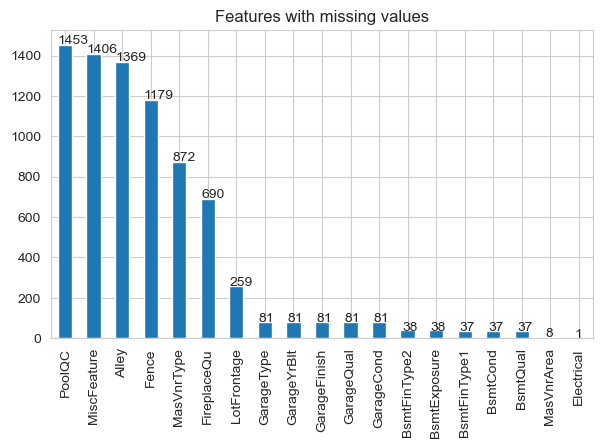

In [17]:
plt.figure(figsize=(7,4))
sns.set_style("whitegrid")
missing_val = df.isnull().sum()
missing_val = missing_val[missing_val > 0]
print("Total number of features with missing values in the training data set:", len(missing_val))
missing_val.sort_values(ascending=False, inplace=True)
ax = missing_val.plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("Features with missing values")
plt.show()

Obtain information from the data description file:

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone


FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

LotFrontage: Linear feet of street connected to property

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches)
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

MasVnrArea: Masonry veneer area in square feet

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

Similar as we discovered in 1.1 None value has a meaning to the next features: 'Fence', 'MasVnrType', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'. And it makes sense that the feature 'GarageYrBlt' has the same amount of missing values as other features about a Garage since there isn't a garage in these houses.

It's necessary to understand how to deal with missing values in the next features: LotFrontage, MasVnrArea, and Electrical.

At that point,  we will create a list of features where None value has a meaning.

In [18]:
feat_wn = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtFinType1', 'BsmtCond', 'BsmtQual']

#### Features correlation

It would be useful to investigate more about the features correllation.

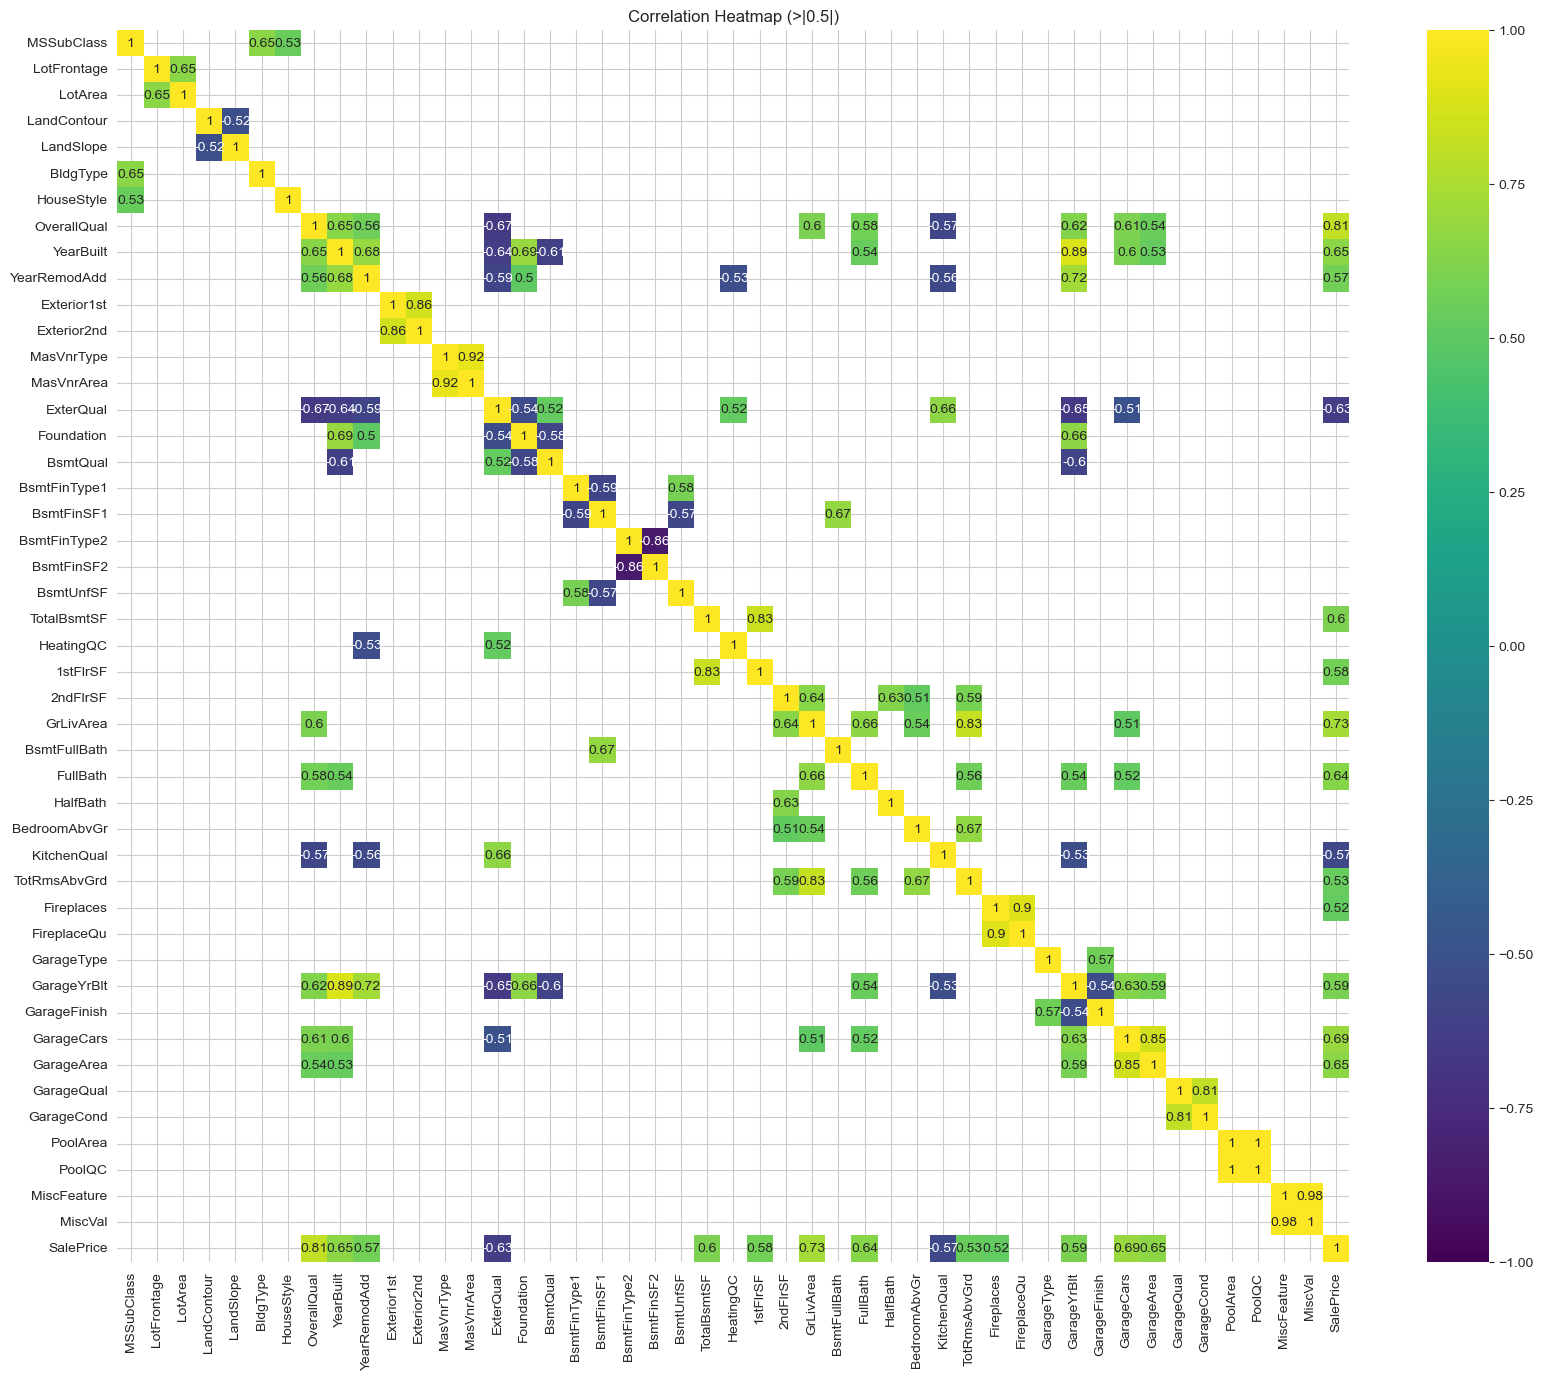

In [19]:
#calculate correlation matrix
corr = df_cat.corr(method='spearman')

# leave only features that have correration index with others > 0.5
mask = (abs(corr) > 0.5)
corr_s = corr[mask].sum()

# remove others features from the heatmap
corr.drop(corr_s[corr_s==1].index, inplace=True)
corr.drop(corr_s[corr_s==1].index, axis=1, inplace=True)

# Plotting the heatmap using Matplotlib and Seaborn
plt.figure(figsize=(20, 16))
#sns.heatmap(corr_matrix[mask], vmin=-0.8, vmax=0.8, square=True, annot=True, cmap='viridis')
sns.heatmap(corr[mask], vmin=-1, vmax=1, square=True, annot=True, cmap='viridis')

# Customize the plot
plt.title("Correlation Heatmap (>|0.5|)")
plt.show()

The plot above revealed, that some features have robust correlations, for instance, 'Fireplaces' and 'FireplaceQy', 'MiscFeature' and 'MiscVal'. We need to keep it in mind because it suggests potential multicollinearity, which can be problematic for certain types of regression models since it can affect the stability of the coefficient estimates.

## Part 2. Baseline

To establish a baseline we will build a simple Linear Regression model. 

To do so we will select features with the highest absolute value of the correlation coefficient, handle missing values among them, scale values and, eliminate features with high correlation coefficient between each other to avoid multicollinearity.

In [20]:
# check missing values
df[h_corr_feats.index].isna().sum()

SalePrice        0
OverallQual      0
GrLivArea        0
GarageCars       0
YearBuilt        0
GarageArea       0
FullBath         0
TotalBsmtSF      0
GarageYrBlt     81
1stFlrSF         0
YearRemodAdd     0
TotRmsAbvGrd     0
Fireplaces       0
KitchenQual      0
ExterQual        0
dtype: int64

In [21]:
# check if there is strong correlation (>0.7) among the features
feat_list = list(h_corr_feats.index)[1:]
tmp_fl = []
for f in feat_list:
    corr_info = df_cat[feat_list].corr()[f].sort_values(ascending=False)
    if corr_info[(abs(corr_info) >= 0.7) & (abs(corr_info) != 1)].any():
        tmp_c = corr_info[(abs(corr_info) >= 0.7) & (abs(corr_info) != 1)]
        tmp_fl.append(tmp_c.name)
        
        # to avoid printing duplicates
        for i in tmp_c.index:
            if i not in tmp_fl:
                tmp_fl.append(i)
                print(tmp_c, "\n")

TotRmsAbvGrd    0.825489
Name: GrLivArea, dtype: float64 

GarageArea    0.882475
Name: GarageCars, dtype: float64 

GarageYrBlt    0.825667
Name: YearBuilt, dtype: float64 

1stFlrSF    0.81953
Name: TotalBsmtSF, dtype: float64 



There are 8 features having strong correlation among each other. We should make a decision about each feature in pairs.

1. TotalBsmtSF: Total square feet of basement area<br>
GrLivArea: Above grade (ground) living area square feet

The correlation between these features makes sense; however, GrLivArea has a stronger correlation with the label 'SalePrice'. Therefore, for the Linear Regression model, we will eliminate 'TotalBsmtSF'.

2. GarageCars: Size of garage in car capacity<br>
GarageArea: Size of garage in square feet

The correlation between these features makes sense. Since 'GarageCars' has a stronger correlation with the label 'SalePrice', we will eliminate 'GarageArea', which also has missing values.

3. GarageYrBlt: Year garage was built<br>
YearBuilt: Original construction date

For the same reasons, we will eliminate 'GarageYrBlt'.

4. 1stFlrSF: First Floor square feet  <br>
TotalBsmtSF: Total square feet of basement area

For the same reasons, we will eliminate '1stFlrSF'.


In [22]:
# create final list of features
list_feat_lr = ['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt',
       'FullBath', 'YearRemodAdd', 'TotRmsAbvGrd', 'Fireplaces', 'KitchenQual',
       'ExterQual']

# Scale values
scaler = StandardScaler()
df_cat[list_feat_lr] = scaler.fit_transform(df_cat[list_feat_lr])

# split the data
X_train, X_test, y_train, y_test = train_test_split(df_cat[list_feat_lr], df['SalePrice'], test_size=0.25)

# train model
ols_model = linear_model.LinearRegression()
ols_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ols = ols_model.predict(X_test)

# Evaluate the model's performance using MSE
print(f'MSE for OLS: {mean_squared_error(y_test, y_pred_ols)}')
print(f'RMSE for OLS: {np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred_ols)))}')
print(f'R^2 score for OLS: {ols_model.score(X_test, y_test)}')

MSE for OLS: 1643717806.8919249
RMSE for OLS: 0.20166979119065837
R^2 score for OLS: 0.7062450968241057


In [23]:
test_data = pd.read_csv('test.csv')
test_data[list_feat_lr]
test_data_cat = test_data.copy()
test_data_cat = test_data_cat[list_feat_lr].fillna(0)
# get dtypes in columns
c_dtype = test_data_cat.dtypes
# we need to convert our categorical feature to numerical
for c in c_dtype[c_dtype=='object'].index:
    test_data_cat[c] = test_data_cat[c].astype('category').cat.codes

test_data_cat[list_feat_lr] = scaler.fit_transform(test_data_cat[list_feat_lr])
y_tpred_ols = ols_model.predict(test_data_cat[list_feat_lr])

# create submission file
subm = pd.DataFrame()
subm['Id'] = test_data['Id']
subm['SalePrice'] = y_tpred_ols
subm.set_index('Id').to_csv('submission_bl.csv')

## Part 3. Solution

### Data preprocessing
#### Handling missing values

In [24]:
# fill missing values with a string label for the features where None value has a meaning
df_fna = df.copy()
df_fna[feat_wn] = df_fna[feat_wn].fillna('NA')
new_mv = df_fna.isna().sum()
new_mv[new_mv>0]

LotFrontage    259
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

In [25]:
mva = df_fna[df_fna.loc[:,'MasVnrType'].isna()]['MasVnrArea']
mva[mva > 0]

Series([], Name: MasVnrArea, dtype: float64)

Most of values MasVnrArea are 0 if MasVnrType is missing, but some of them has non zero value

In [26]:
mvt = df_fna[df_fna.loc[:,'MasVnrArea'] == 0]['MasVnrType']
print(mvt.unique())
mvt[~mvt.isna()]

['NA' 'BrkFace' 'Stone']


1       NA
3       NA
5       NA
8       NA
9       NA
        ..
1454    NA
1455    NA
1457    NA
1458    NA
1459    NA
Name: MasVnrType, Length: 861, dtype: object

Meanwhile two rows have existing MasVnrType while MasVnrArea == 0.

In [27]:
# Replace MasVnrArea with 0 where MasVnrArea==1
index_mva = df_fna[df_fna.loc[:,'MasVnrArea'] == 1].index
df_fna.loc[index_mva,'MasVnrArea'] = 0

# Replace MasVnrType in rows where MasVnrArea==0 with 'NoMasVnr' 
index_mvt = df_fna[(df_fna.loc[:,'MasVnrArea'] == 0) & (~df_fna.loc[:,'MasVnrType'].isna())].index
df_fna.loc[index_mvt,'MasVnrType'] = 'NoMasVnr'

# Fill missing values in MasVnrType with 'NoMasVnr' 
df_fna.loc[:,'MasVnrType'].fillna('NoMasVnr', inplace=True)

LotFrontage has 259 missing values. Let's use an SVM Regressor algorithm to estimate and fill in these missing values.

In [28]:
train_LF = df[~df.LotFrontage.isnull()]
test_LF = df[df.LotFrontage.isnull()]
target = train_LF['LotFrontage']

print(f"Number of filled LotFrontage data: {len(train_LF)}")
print(f"Number of missing LotFrontage data: {len(test_LF)}")

display(pd.DataFrame(df['LotFrontage'].describe()).transpose())

Number of filled LotFrontage data: 1201
Number of missing LotFrontage data: 259


,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0


Now, let's look at the LotFrontage values in the Train LotFrontage dataset using a boxplot and distribution plot. Here's what we can see:

* Many properties have low LotFrontage values, shown as a peak on the left side of the distribution plot. The boxplot suggests some of these values might be unusual, as they're far from the main cluster.
* There are also quite a few properties with high LotFrontage values, going beyond what's typical.

In simple terms, there are outliers present at both of the LotFrontage range.

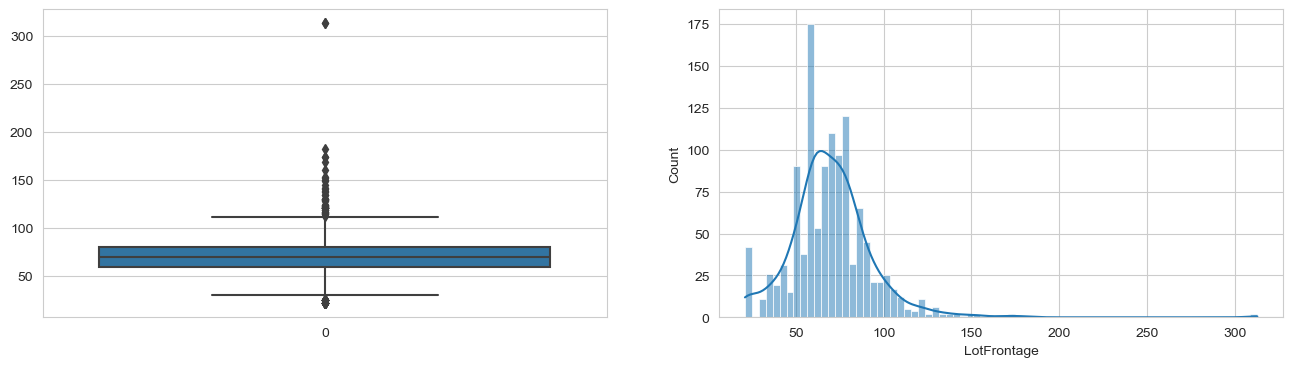

In [29]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(target, ax=ax[0])
sns.histplot(target, ax=ax[1], kde=True)
plt.show()


Miscellaneous feature not covered in other categories

In [30]:
df_fna[(df_fna['MiscVal'] != 0)][['MiscFeature']].groupby('MiscFeature').value_counts().sort_values(ascending=False)

MiscFeature
Shed    48
Gar2     2
Othr     1
TenC     1
Name: count, dtype: int64

In [31]:
# Create dummy columns based on values in MiscFeature
dummy_columns = pd.get_dummies(df_fna['MiscFeature'], prefix='mf')

# Multiply each dummy column by corresponding MiscVal
for col in dummy_columns.columns:
    dummy_columns[col] = dummy_columns[col] * df['MiscVal']

# Concatenate the dummy columns with the original DataFrame
df_fna = pd.concat([df_fna, dummy_columns], axis=1)

# Drop the original 'MiscFeature' column
df_fna.drop(['MiscFeature','MiscVal'], axis=1, inplace=True)